<a href="https://colab.research.google.com/github/dev-69/MajorProject/blob/main/UnderSamplingNotebookk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import gensim
from gensim.models import KeyedVectors

In [2]:
df = pd.read_pickle("/content/drive/MyDrive/Major Project Learnings/Prepared_Data.pkl")
df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE,DAYS_NEXT_ADMIT,index,CATEGORY,TEXT,OUTPUT_LABEL
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,NaT,NaN,NaN,48470.0,Discharge summary,Admission Date: [**2101-10-20**] Discharg...,0
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,NaT,NaN,NaN,4782.0,Discharge summary,Admission Date: [**2191-3-16**] Discharge...,0
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,NaT,NaN,NaN,24476.0,Discharge summary,Admission Date: [**2175-5-30**] Dischar...,0
7,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14 10:15:00,EMERGENCY,NaT,NaN,NaN,57341.0,Discharge summary,"Name: [**Known lastname 10050**], [**Known fi...",0
9,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaT,EMERGENCY,NaT,NaN,NaN,34829.0,Discharge summary,Admission Date: [**2178-4-16**] ...,0


In [3]:
df.TEXT = df.TEXT.fillna(' ')
df.TEXT = df.TEXT.str.replace('\n',' ')
df.TEXT = df.TEXT.str.replace('\r',' ')
df.TEXT = df.TEXT.str.lower()
df.TEXT = df.TEXT.str.replace(r'[^a-zA-Z\s]', '', regex=True)
df.TEXT = df.TEXT.str.replace(r'\s+', ' ', regex=True)
df.TEXT = df.TEXT.str.strip()

In [4]:
df_filtered = df[['SUBJECT_ID', 'HADM_ID', 'TEXT', 'OUTPUT_LABEL']]
X = df_filtered['TEXT']
y = df_filtered['OUTPUT_LABEL']

df_filtered['OUTPUT_LABEL'].value_counts()


,count
OUTPUT_LABEL,
0,48109
1,3004


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_filtered['TEXT'], df_filtered['OUTPUT_LABEL'], test_size=0.2, random_state=42)

In [6]:
import nltk

nltk.download('punkt_tab')
nltk.download('punkt')


from nltk import word_tokenize
word_tokenize('This should be tokenized. 02/02/2018 sentence has stars**')
import string
print(string.punctuation)
def tokenizer_better(text):
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens
my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also']

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

def create_sampling_visualization(X_train, y_train, technique_name, sampled_X, sampled_y):
    """
    Creates a comprehensive visualization for undersampling results including:
    1. Distribution before/after
    2. Class counts and percentages
    3. Sample reduction statistics
    """
    # Create figure with custom layout
    fig = plt.figure(figsize=(20, 10))
    gs = GridSpec(2, 4, figure=fig)

    # Calculate metrics
    original_counts = np.bincount(y_train)
    sampled_counts = np.bincount(sampled_y)

    # Calculate reduction metrics
    total_reduction = len(y_train) - len(sampled_y)
    reduction_percentage = (total_reduction / len(y_train)) * 100

    # Color palette
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']

    # 1. Bar Plot (Before)
    ax1 = fig.add_subplot(gs[0, 0:2])
    bars1 = ax1.bar(np.arange(len(original_counts)), original_counts,
                    color=colors[:len(original_counts)], alpha=0.7)
    ax1.set_title(f'Class Distribution Before {technique_name}', pad=20, fontsize=12)
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')
    ax1.grid(True, alpha=0.3)

    # Add count labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')

    # 2. Bar Plot (After)
    ax2 = fig.add_subplot(gs[0, 2:])
    bars2 = ax2.bar(np.arange(len(sampled_counts)), sampled_counts,
                    color=colors[:len(sampled_counts)], alpha=0.7)
    ax2.set_title(f'Class Distribution After {technique_name}', pad=20, fontsize=12)
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Count')
    ax2.grid(True, alpha=0.3)

    # Add count labels on bars
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')

    # 3. Pie Chart (Before)
    ax3 = fig.add_subplot(gs[1, 0:2])
    original_percentages = original_counts / len(y_train) * 100
    wedges, texts, autotexts = ax3.pie(original_percentages,
                                      labels=[f'Class {i}\n({count:,} samples)'
                                             for i, count in enumerate(original_counts)],
                                      autopct='%1.1f%%',
                                      colors=colors[:len(original_counts)])
    ax3.set_title('Original Class Percentages', pad=20, fontsize=12)

    # 4. Statistics Text Box
    ax4 = fig.add_subplot(gs[1, 2:])
    stats_text = (
        f"Sampling Statistics - {technique_name}\n"
        f"------------------------\n"
        f"Total samples before: {len(y_train):,}\n"
        f"Total samples after: {len(sampled_y):,}\n"
        f"Samples removed: {total_reduction:,}\n"
        f"Reduction: {reduction_percentage:.1f}%\n\n"
        f"Class Distribution After Sampling:\n"
    )

    # Add class distribution
    for i, count in enumerate(sampled_counts):
        percentage = (count / len(sampled_y)) * 100
        stats_text += f"Class {i}: {count:,} samples ({percentage:.1f}%)\n"

    # Add class ratios
    stats_text += "\nClass Ratios (relative to majority class):\n"
    max_class = max(sampled_counts)
    for i, count in enumerate(sampled_counts):
        ratio = max_class / count if count != 0 else float('inf')
        stats_text += f"Class {i}: 1:{ratio:.2f}\n"

    # Add text box
    ax4.text(0.05, 0.95, stats_text,
             transform=ax4.transAxes,
             fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax4.axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

def visualize_all_techniques(X_train, y_train):
    """
    Visualize results for all undersampling techniques
    """
    # Original distribution
    print("\n📊 Original Data Distribution")
    plt.figure(figsize=(10, 5))
    counts = np.bincount(y_train)
    plt.bar(np.arange(len(counts)), counts, color='#66B2FF', alpha=0.7)
    plt.title('Original Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)

    # Add count labels
    for i, count in enumerate(counts):
        plt.text(i, count, str(count), ha='center', va='bottom')

    plt.show()

    # Random Undersampling
    print("\n🎲 Random Undersampling Results")
    rus = RandomUnderSampler()
    X_rus, y_rus = rus.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'Random Undersampling', X_rus, y_rus)

    # Near Miss
    print("\n🎯 Near Miss Results")
    nm = NearMiss()
    X_nm, y_nm = nm.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'Near Miss', X_nm, y_nm)

    # Tomek Links
    print("\n🔗 Tomek Links Results")
    tmk = TomekLinks()
    X_tmk, y_tmk = tmk.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'Tomek Links', X_tmk, y_tmk)

    return X_rus, y_rus, X_nm, y_nm, X_tmk, y_tmk

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=1000, tokenizer=tokenizer_better, stop_words=my_stop_words)
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

print("1. Using TF-IDF Vectorizer")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


1. Using TF-IDF Vectorizer


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

def create_sampling_visualization(X_train, y_train, technique_name, sampled_X, sampled_y):
    """
    Creates a comprehensive visualization for undersampling results including:
    1. Distribution before/after
    2. Class counts and percentages
    3. Sample reduction statistics
    """
    # Create figure with custom layout
    fig = plt.figure(figsize=(20, 15))
    gs = GridSpec(3, 4, figure=fig)

    # Calculate metrics
    original_counts = np.bincount(y_train)
    sampled_counts = np.bincount(sampled_y)

    # Calculate reduction metrics
    total_reduction = len(y_train) - len(sampled_y)
    reduction_percentage = (total_reduction / len(y_train)) * 100

    # 1. Bar Plot (Before)
    ax1 = fig.add_subplot(gs[0, 0:2])
    sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
    ax1.set_title(f'Class Distribution Before {technique_name}', pad=20, fontsize=12)
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')
    ax1.set_xticks(np.arange(len(original_counts)))  # Class numbers (0, 1, etc.)
    ax1.grid(True, alpha=0.3)

    # 2. Bar Plot (After)
    ax2 = fig.add_subplot(gs[0, 2:])
    sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)
    ax2.set_title(f'Class Distribution After {technique_name}', pad=20, fontsize=12)
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Count')
    ax2.set_xticks(np.arange(len(sampled_counts)))  # Class numbers (0, 1, etc.)
    ax2.grid(True, alpha=0.3)

    # 3. Pie Chart (Before)
    ax3 = fig.add_subplot(gs[1, 0:2])
    original_percentages = original_counts / len(y_train) * 100
    wedges, texts, autotexts = ax3.pie(original_percentages,
                                      labels=[f'Class {i}\n({count:,} samples)'
                                             for i, count in enumerate(original_counts)],
                                      autopct='%1.1f%%',
                                      colors=sns.color_palette('Set2', len(original_counts)))
    ax3.set_title('Class Distribution (Before)', pad=20, fontsize=12)

    # 4. Pie Chart (After)
    ax4 = fig.add_subplot(gs[1, 2:])
    sampled_percentages = sampled_counts / len(sampled_y) * 100
    wedges, texts, autotexts = ax4.pie(sampled_percentages,
                                      labels=[f'Class {i}\n({count:,} samples)'
                                             for i, count in enumerate(sampled_counts)],
                                      autopct='%1.1f%%',
                                      colors=sns.color_palette('Set2', len(sampled_counts)))
    ax4.set_title(f'Class Distribution (After)', pad=20, fontsize=12)

    # 5. Statistics Text Box
    ax5 = fig.add_subplot(gs[2, 0:2])
    stats_text = (
        f"Sampling Statistics - {technique_name}\n"
        f"------------------------\n"
        f"Total samples before: {len(y_train):,}\n"
        f"Total samples after: {len(sampled_y):,}\n"
        f"Samples removed: {total_reduction:,}\n"
        f"Reduction: {reduction_percentage:.1f}%\n\n"
        f"Class Distribution After Sampling:\n"
    )

    # Add class distribution
    for i, count in enumerate(sampled_counts):
        percentage = (count / len(sampled_y)) * 100
        stats_text += f"Class {i}: {count:,} samples ({percentage:.1f}%)\n"

    # Add imbalance metrics
    stats_text += "\nImbalance Metrics:\n"
    max_class = max(sampled_counts)
    min_class = min(sampled_counts)
    imbalance_ratio = max_class / min_class
    stats_text += f"Imbalance Ratio: {imbalance_ratio:.2f}\n"

    # Add class ratios
    stats_text += "\nClass Ratios (relative to majority class):\n"
    for i, count in enumerate(sampled_counts):
        ratio = max_class / count if count != 0 else float('inf')
        stats_text += f"Class {i}: 1:{ratio:.2f}\n"

    # Add text box
    ax5.text(0.05, 0.95, stats_text,
             transform=ax5.transAxes,
             fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax5.axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

def visualize_all_techniques(X_train, y_train):
    """
    Visualize results for all undersampling techniques
    """
    # Original distribution
    print("\n📊 Original Data Distribution")
    plt.figure(figsize=(15, 5))

    # Bar plot
    plt.subplot(121)
    counts = np.bincount(y_train)
    sns.barplot(x=np.arange(len(counts)), y=counts, palette='Set2')
    plt.title('Original Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(np.arange(len(counts)))  # Class numbers (0, 1, etc.)
    plt.grid(True, alpha=0.3)

    # Pie Chart
    plt.subplot(122)
    original_percentages = counts / len(y_train) * 100
    wedges, texts, autotexts = plt.pie(original_percentages,
                                      labels=[f'Class {i}\n({count:,} samples)'
                                             for i, count in enumerate(counts)],
                                      autopct='%1.1f%%',
                                      colors=sns.color_palette('Set2', len(counts)))
    plt.title('Class Distribution (Before)', pad=20, fontsize=12)

    plt.tight_layout()
    plt.show()

    # Random Undersampling
    print("\n🎲 Random Undersampling Results")
    rus = RandomUnderSampler()
    X_rus, y_rus = rus.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'Random Undersampling', X_rus, y_rus)

    # Near Miss
    print("\n🎯 Near Miss Results")
    nm = NearMiss()
    X_nm, y_nm = nm.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'Near Miss', X_nm, y_nm)

    # Tomek Links
    print("\n🔗 Tomek Links Results")
    tmk = TomekLinks()
    X_tmk, y_tmk = tmk.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'Tomek Links', X_tmk, y_tmk)

    return X_rus, y_rus, X_nm, y_nm, X_tmk, y_tmk



📊 Original Data Distribution


<ipython-input-9-c55256183251>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(counts)), y=counts, palette='Set2')


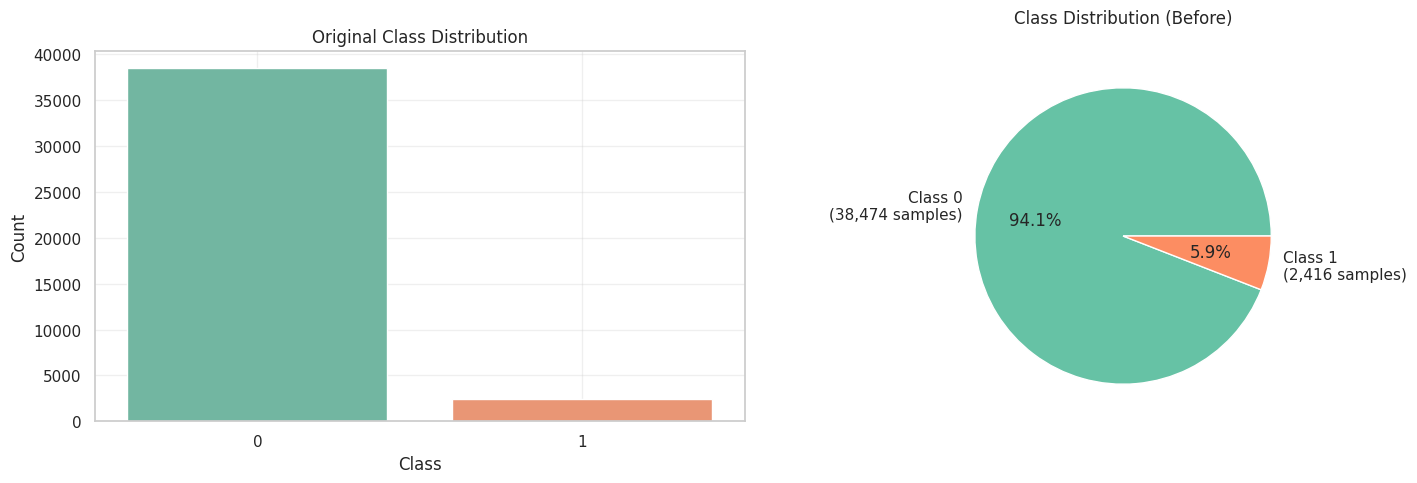


🎲 Random Undersampling Results


<ipython-input-9-c55256183251>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
<ipython-input-9-c55256183251>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)


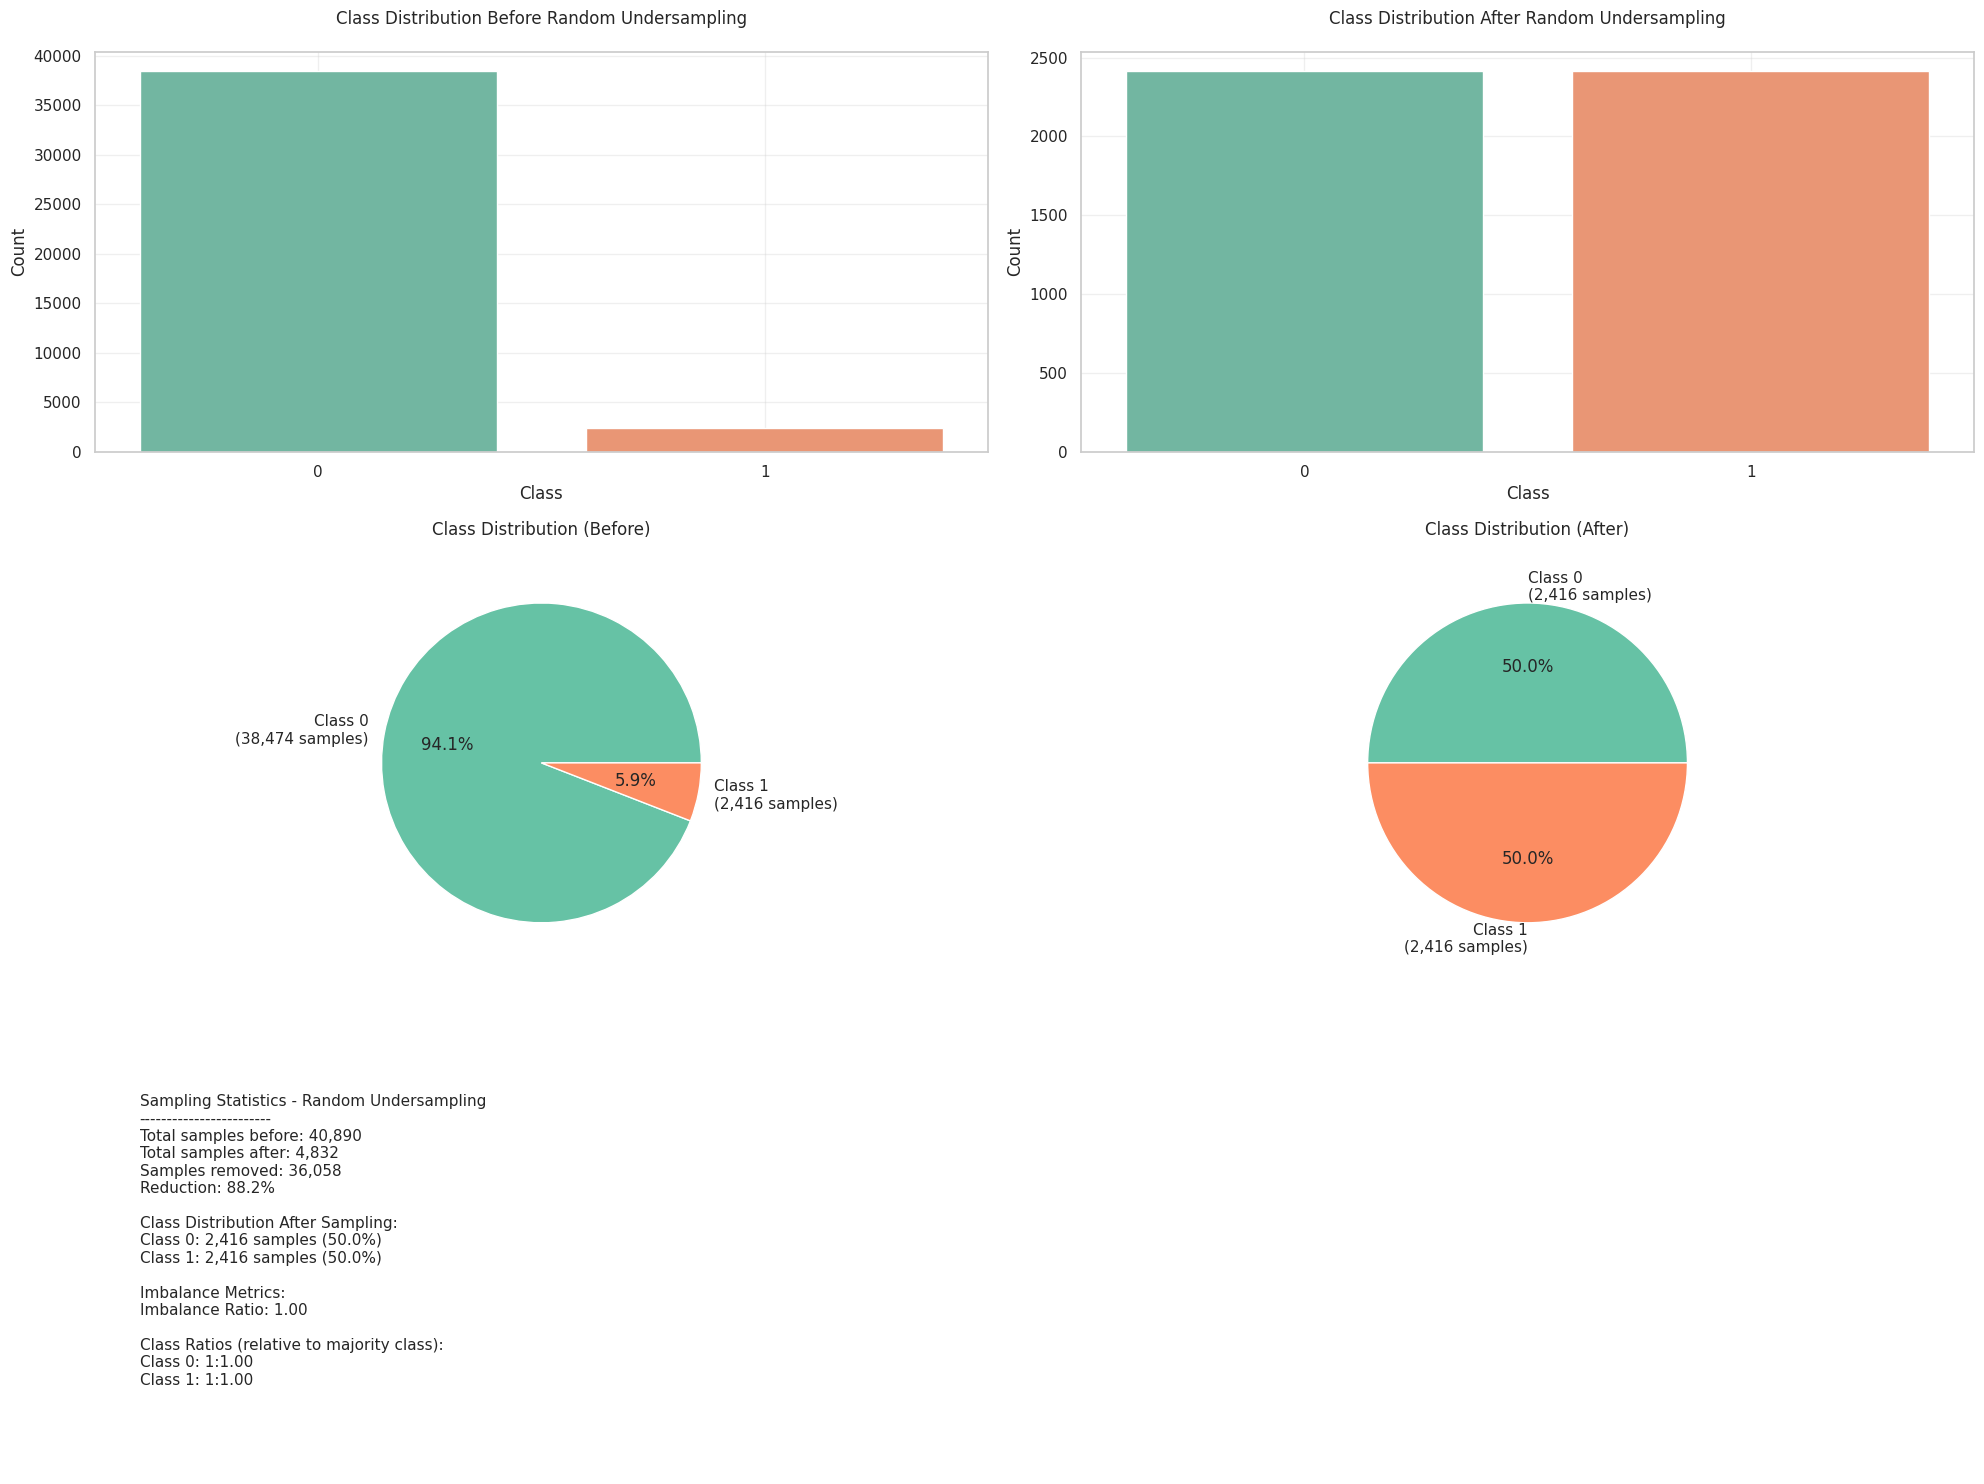


🎯 Near Miss Results


<ipython-input-9-c55256183251>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
<ipython-input-9-c55256183251>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)


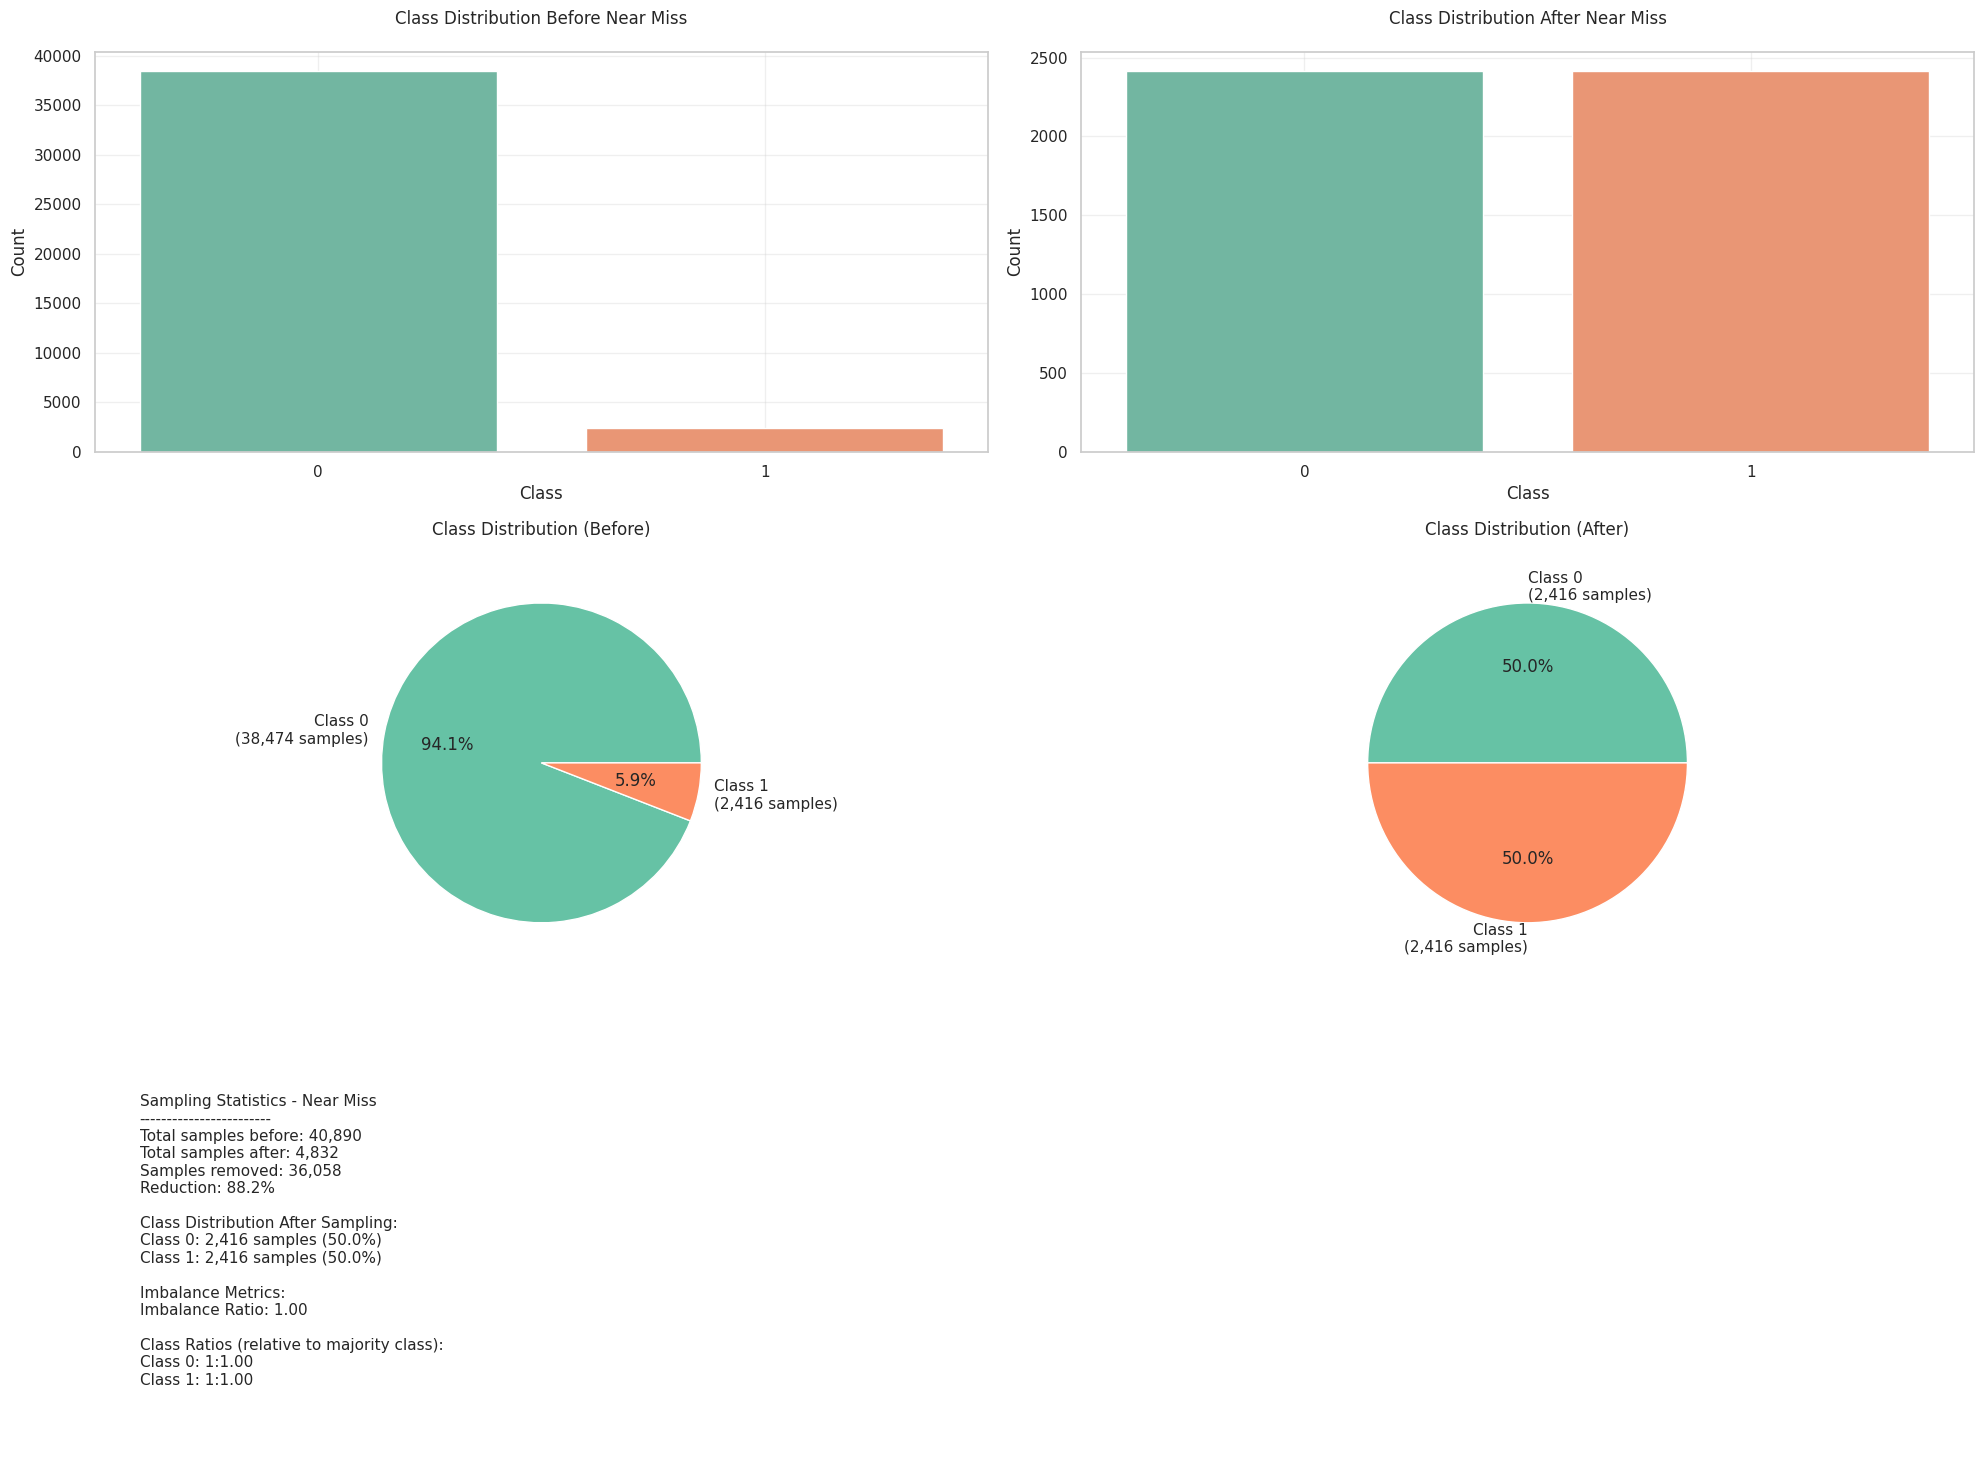


🔗 Tomek Links Results


<ipython-input-9-c55256183251>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
<ipython-input-9-c55256183251>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)


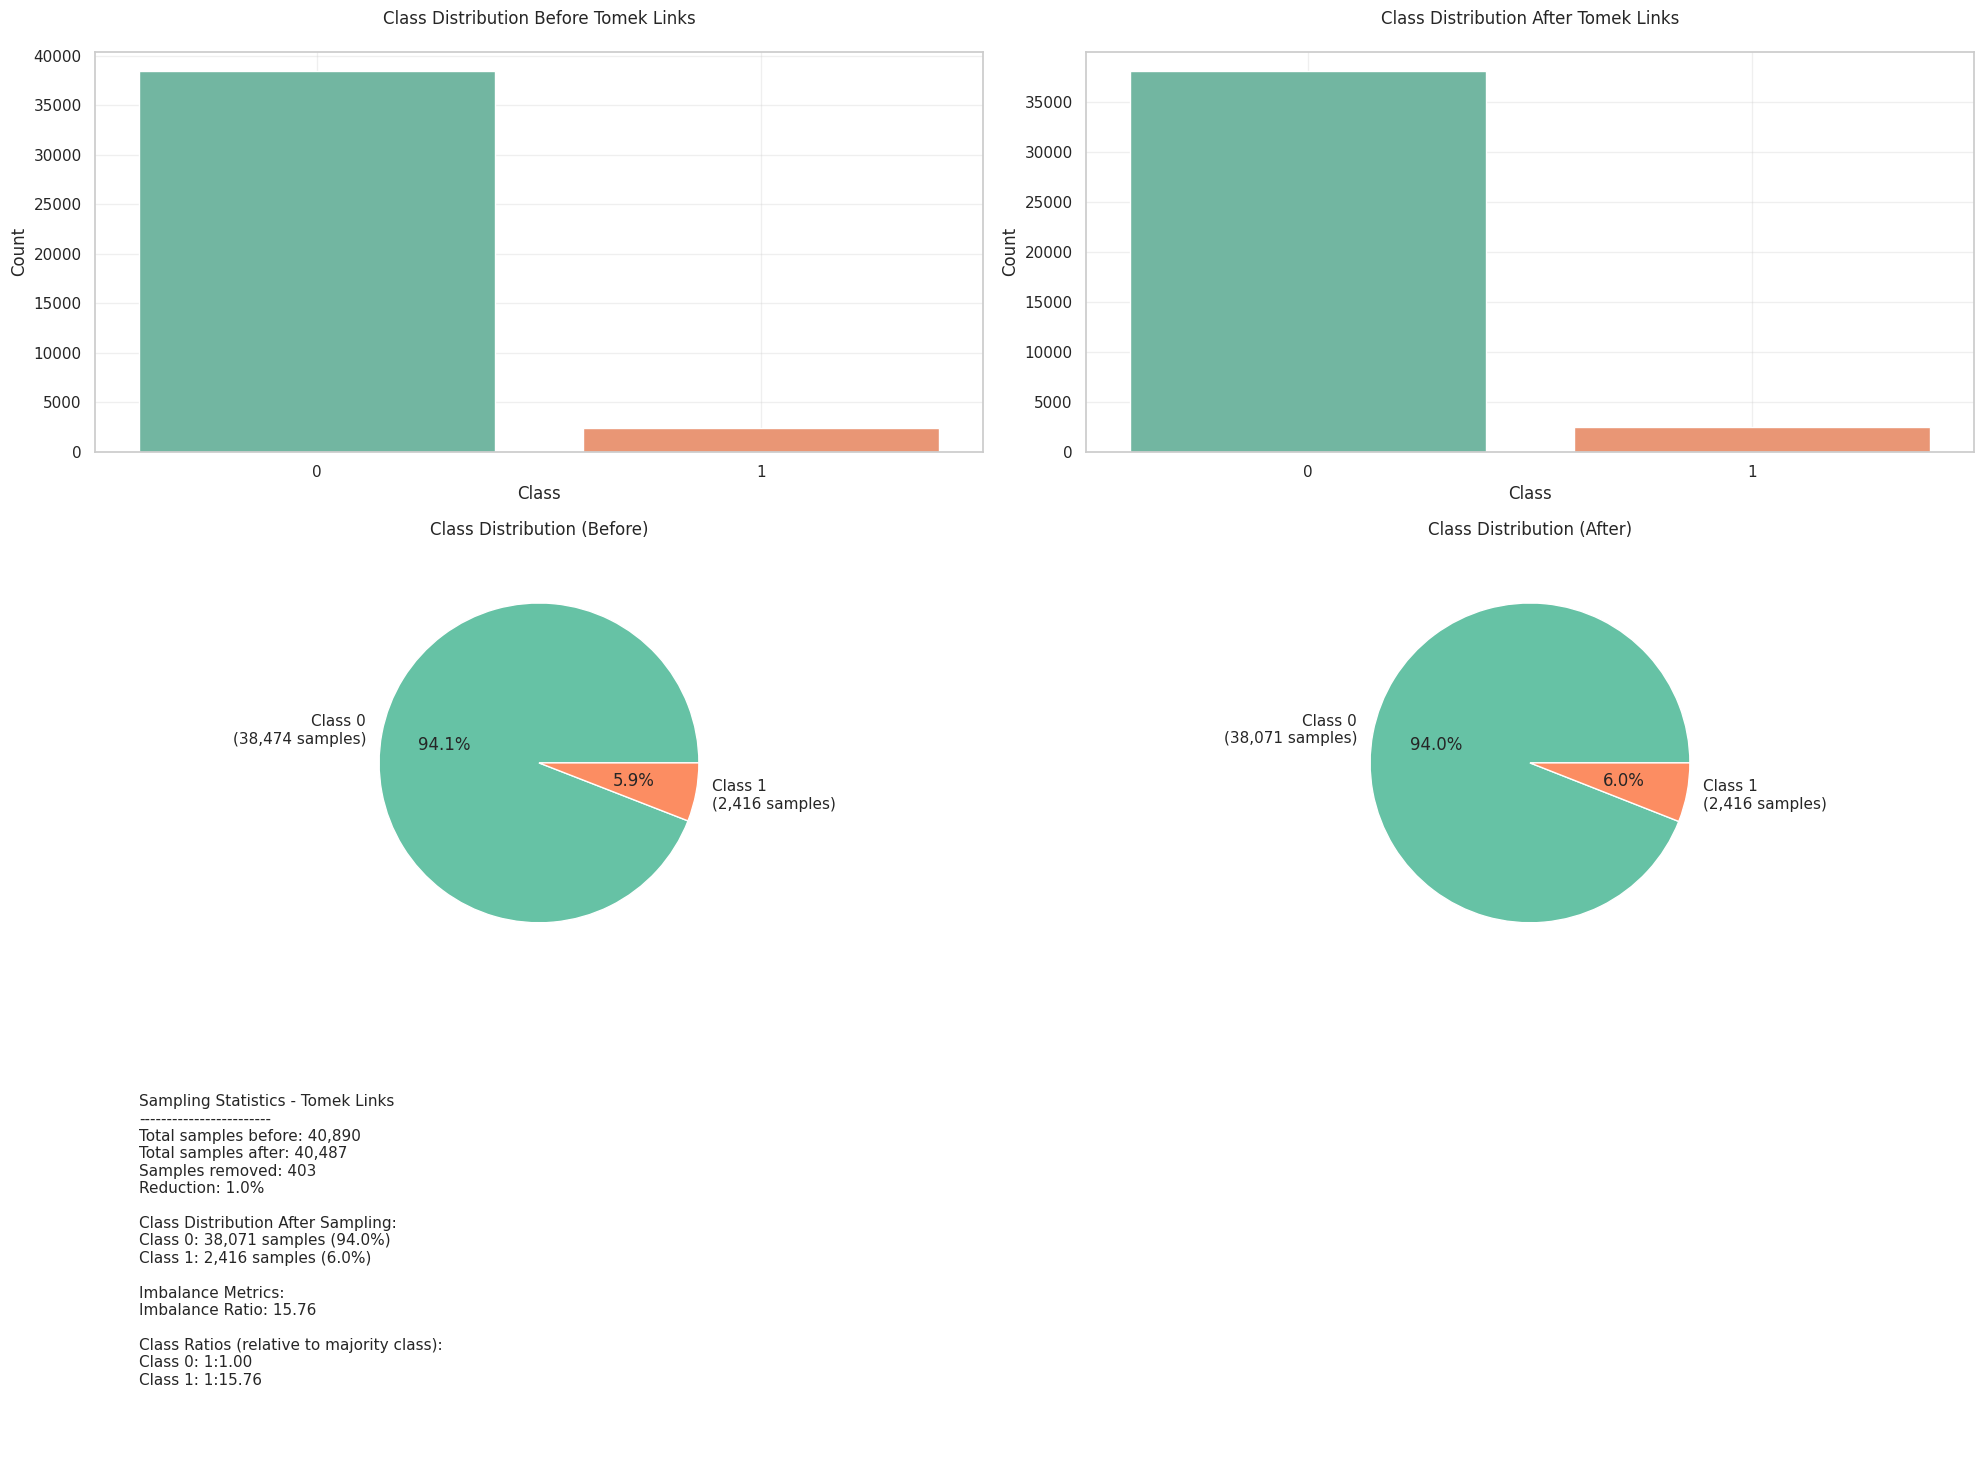

In [10]:
X_rus, y_rus, X_nm, y_nm, X_tmk, y_tmk = visualize_all_techniques(X_train_vect, y_train)

In [11]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [24]:
def classification(X_train, y_train, X_test, y_test):

    classifiers = [
        KNeighborsClassifier(3),
        DecisionTreeClassifier(max_depth=19, min_samples_split=10),
        RandomForestClassifier(n_estimators=450),
        AdaBoostClassifier(n_estimators=100),
        GradientBoostingClassifier(n_estimators=300),
        LogisticRegression(C=1, penalty='l2')]

    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__

        print("="*30)
        print(name)

        print('****Results****')
        train_predictions = clf.predict(X_test)

        # AUC Score
        acc = roc_auc_score(y_test, train_predictions)
        print("AUC: {:.4%}".format(acc))

        # Classification Report
        print("Classification report: \n", classification_report_imbalanced(y_test, train_predictions))

        # Confusion Matrix
        cm = confusion_matrix(y_test, train_predictions)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title(f'Confusion Matrix for {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    print("="*30)


In [25]:
def undersampling_results(X_rus,y_rus,X_tmk,y_tmk,X_nm,y_nm,X_test_vect,y_test):

    print("Random Undersampler results \n")
    classification(X_rus,y_rus,X_test_vect,y_test)

    print("Near Miss results \n")
    classification(X_nm,y_nm,X_test_vect,y_test)

    print("Tomek links results \n")
    classification(X_tmk,y_tmk,X_test_vect,y_test)


Random Undersampler results 

KNeighborsClassifier
****Results****
AUC: 57.7949%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.60      0.55      0.74      0.58      0.34      9635
          1       0.08      0.55      0.60      0.14      0.58      0.33       588

avg / total       0.91      0.60      0.55      0.71      0.58      0.33     10223



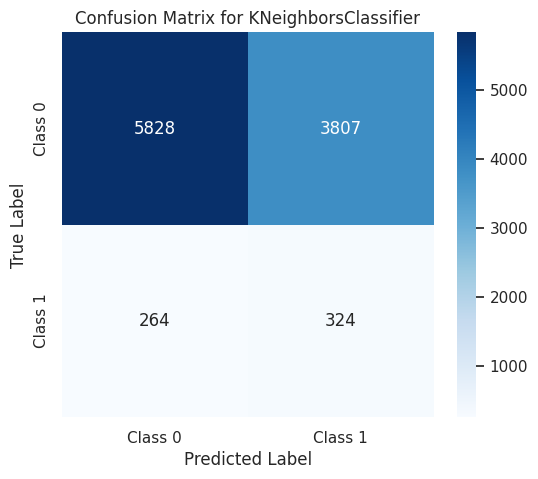

DecisionTreeClassifier
****Results****
AUC: 56.1868%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.61      0.51      0.75      0.56      0.32      9635
          1       0.07      0.51      0.61      0.13      0.56      0.31       588

avg / total       0.90      0.61      0.52      0.71      0.56      0.32     10223



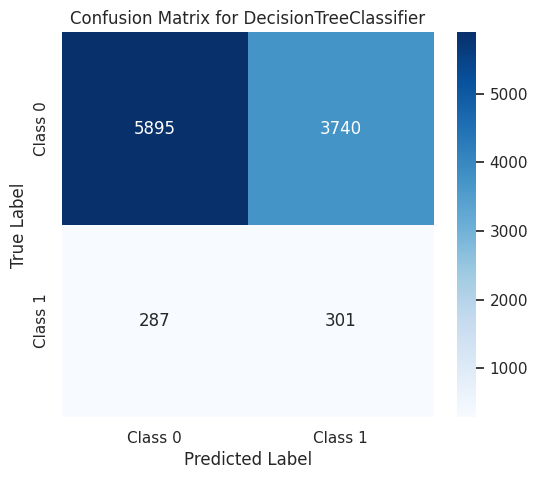

RandomForestClassifier
****Results****
AUC: 66.4083%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.65      0.67      0.78      0.66      0.44      9635
          1       0.11      0.67      0.65      0.18      0.66      0.44       588

avg / total       0.92      0.66      0.67      0.75      0.66      0.44     10223



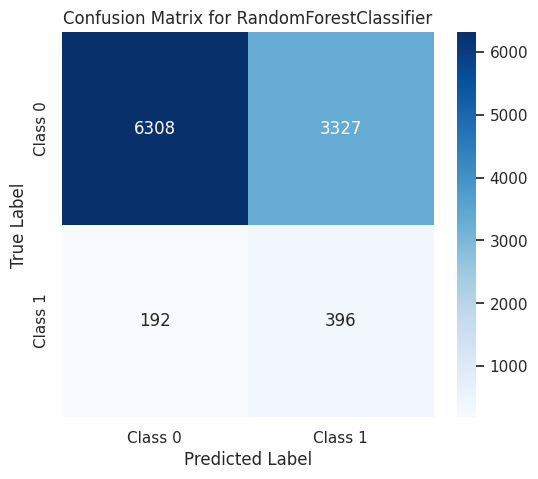

AdaBoostClassifier
****Results****
AUC: 64.8628%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.67      0.63      0.79      0.65      0.42      9635
          1       0.10      0.63      0.67      0.18      0.65      0.42       588

avg / total       0.92      0.67      0.63      0.76      0.65      0.42     10223



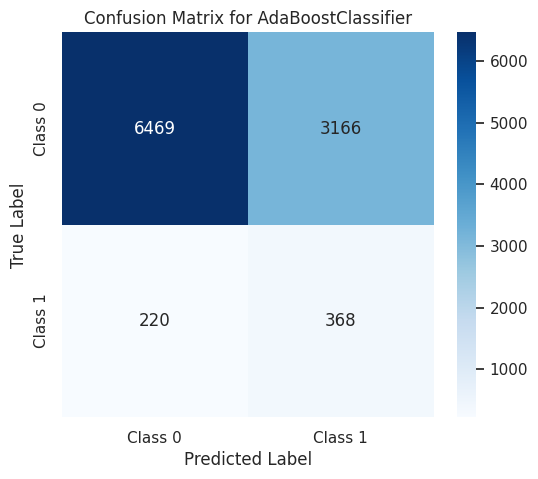

GradientBoostingClassifier
****Results****
AUC: 65.4218%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.65      0.66      0.78      0.65      0.43      9635
          1       0.10      0.66      0.65      0.18      0.65      0.43       588

avg / total       0.92      0.65      0.66      0.74      0.65      0.43     10223



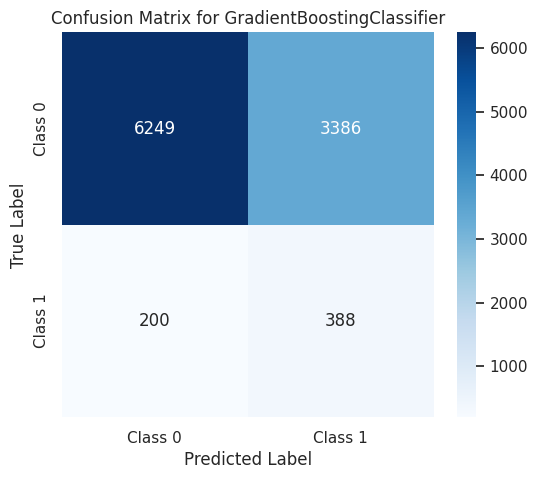

LogisticRegression
****Results****
AUC: 66.5308%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.66      0.67      0.78      0.67      0.44      9635
          1       0.11      0.67      0.66      0.19      0.67      0.44       588

avg / total       0.92      0.66      0.67      0.75      0.67      0.44     10223



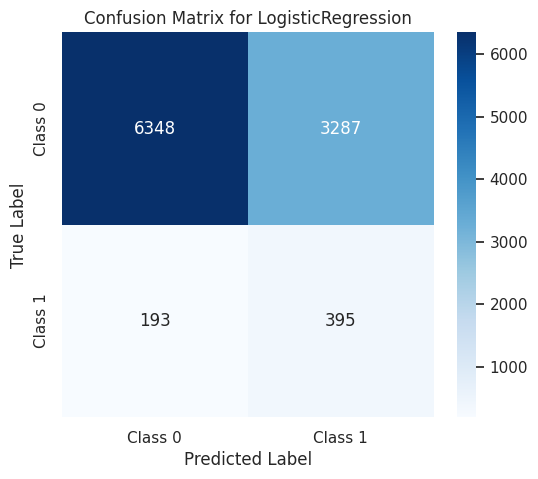

Near Miss results 

KNeighborsClassifier
****Results****
AUC: 55.1435%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.39      0.71      0.55      0.53      0.27      9635
          1       0.07      0.71      0.39      0.12      0.53      0.29       588

avg / total       0.91      0.41      0.70      0.53      0.53      0.27     10223



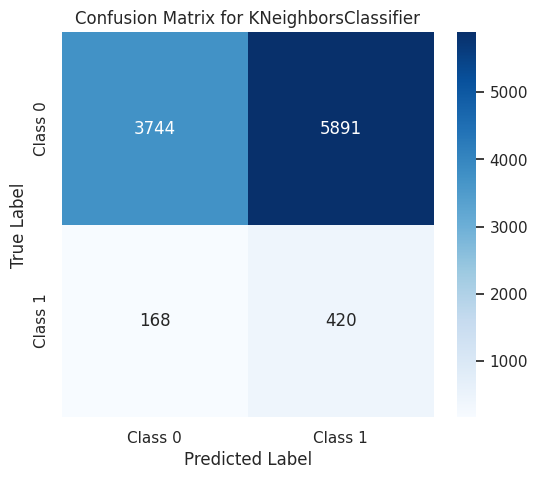

DecisionTreeClassifier
****Results****
AUC: 52.4471%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.12      0.93      0.21      0.33      0.10      9635
          1       0.06      0.93      0.12      0.11      0.33      0.12       588

avg / total       0.91      0.16      0.89      0.20      0.33      0.10     10223



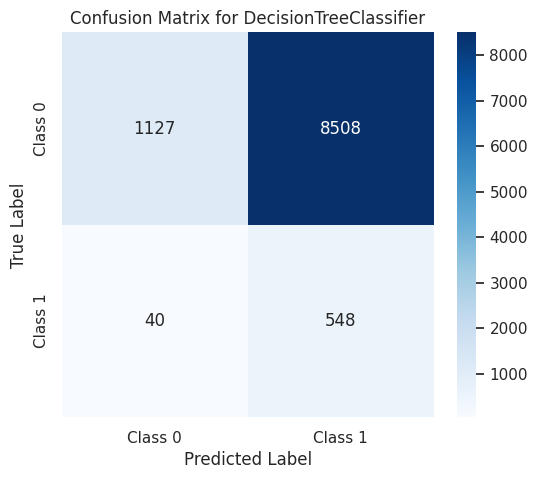

RandomForestClassifier
****Results****
AUC: 52.9861%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.11      0.95      0.20      0.32      0.10      9635
          1       0.06      0.95      0.11      0.11      0.32      0.11       588

avg / total       0.92      0.16      0.90      0.19      0.32      0.10     10223



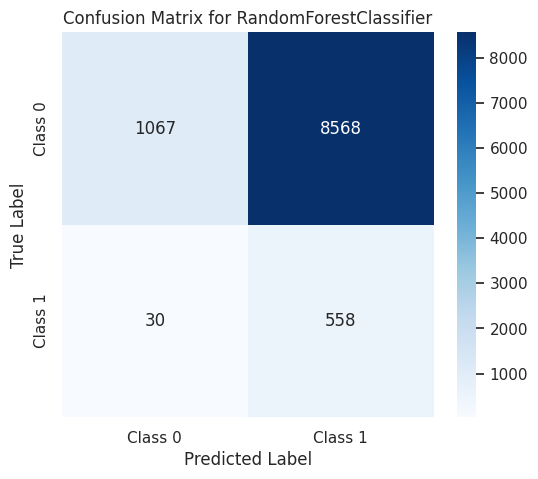

AdaBoostClassifier
****Results****
AUC: 53.3442%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.12      0.95      0.21      0.33      0.10      9635
          1       0.06      0.95      0.12      0.12      0.33      0.12       588

avg / total       0.92      0.17      0.90      0.20      0.33      0.10     10223



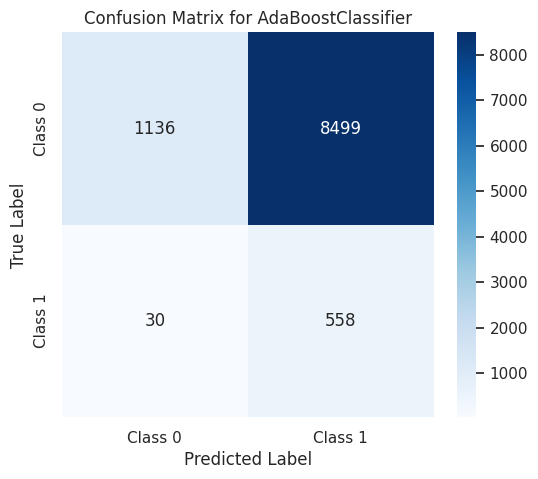

GradientBoostingClassifier
****Results****
AUC: 52.7629%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.11      0.95      0.19      0.32      0.09      9635
          1       0.06      0.95      0.11      0.11      0.32      0.11       588

avg / total       0.92      0.15      0.90      0.19      0.32      0.09     10223



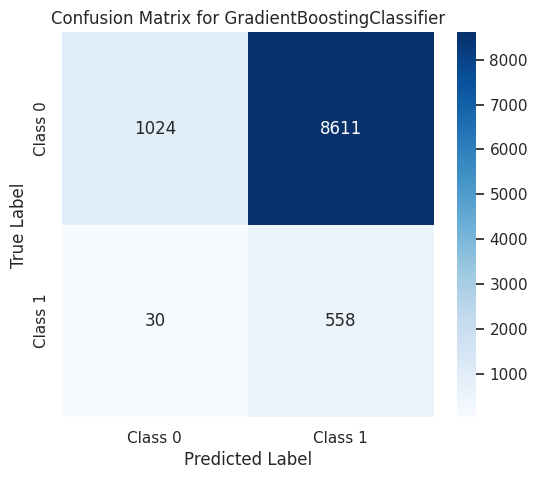

LogisticRegression
****Results****
AUC: 53.1724%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.13      0.94      0.23      0.35      0.11      9635
          1       0.06      0.94      0.13      0.12      0.35      0.13       588

avg / total       0.92      0.17      0.89      0.22      0.35      0.11     10223



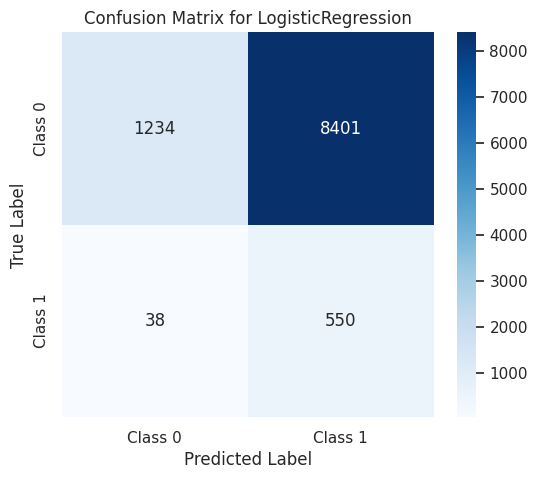

Tomek links results 

KNeighborsClassifier
****Results****
AUC: 52.0070%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.98      0.06      0.96      0.24      0.06      9635
          1       0.18      0.06      0.98      0.09      0.24      0.05       588

avg / total       0.90      0.93      0.11      0.91      0.24      0.06     10223



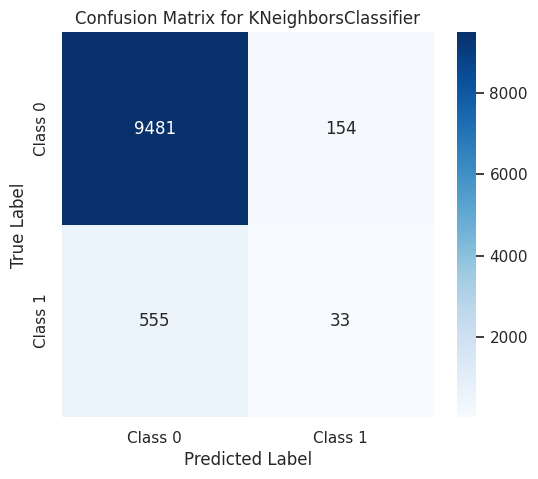

DecisionTreeClassifier
****Results****
AUC: 51.5044%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.97      0.06      0.96      0.24      0.06      9635
          1       0.11      0.06      0.97      0.08      0.24      0.05       588

avg / total       0.90      0.92      0.11      0.91      0.24      0.06     10223



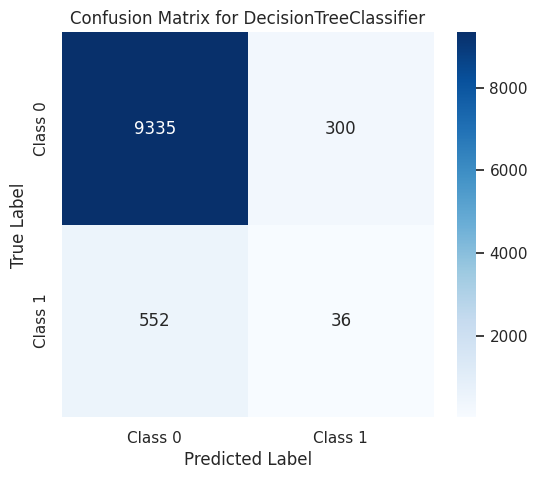

RandomForestClassifier
****Results****
AUC: 50.0000%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      1.00      0.00      0.97      0.00      0.00      9635
          1       0.00      0.00      1.00      0.00      0.00      0.00       588

avg / total       0.89      0.94      0.06      0.91      0.00      0.00     10223



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


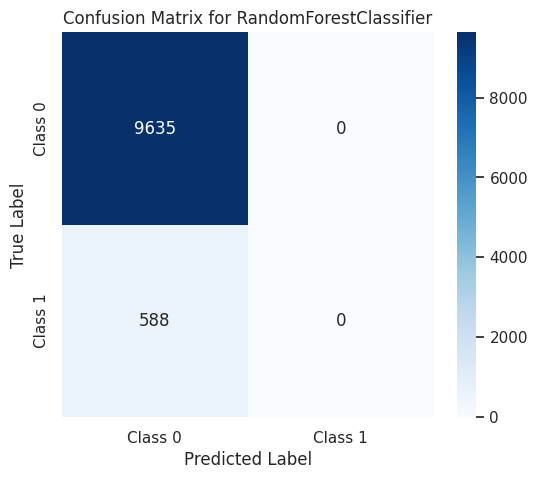

AdaBoostClassifier
****Results****
AUC: 50.0850%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      1.00      0.00      0.97      0.04      0.00      9635
          1       1.00      0.00      1.00      0.00      0.04      0.00       588

avg / total       0.95      0.94      0.06      0.91      0.04      0.00     10223



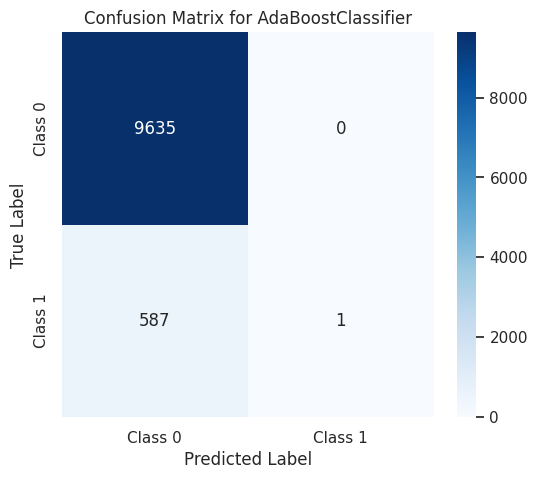

GradientBoostingClassifier
****Results****
AUC: 50.3318%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      1.00      0.01      0.97      0.09      0.01      9635
          1       0.22      0.01      1.00      0.02      0.09      0.01       588

avg / total       0.90      0.94      0.07      0.91      0.09      0.01     10223



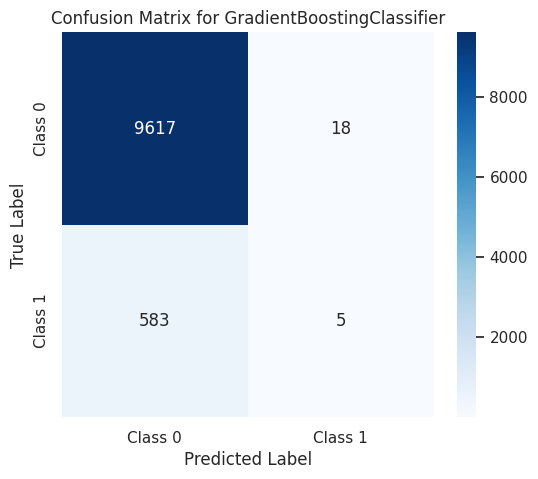

LogisticRegression
****Results****
AUC: 50.0000%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      1.00      0.00      0.97      0.00      0.00      9635
          1       0.00      0.00      1.00      0.00      0.00      0.00       588

avg / total       0.89      0.94      0.06      0.91      0.00      0.00     10223



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


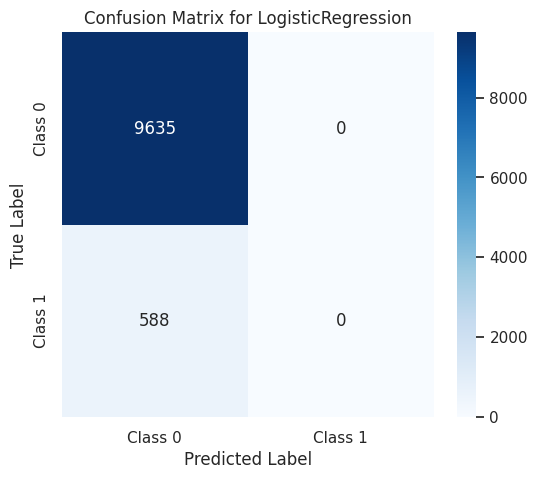

In [26]:
undersampling_results(X_rus,y_rus,X_tmk,y_tmk,X_nm,y_nm,X_test_vect,y_test)